In [2]:
from fastbook import *
import timm

path = untar_data(URLs.MNIST_SAMPLE)

path.ls()

(#3) [Path('/Users/fabiano/.fastai/data/mnist_sample/valid'),Path('/Users/fabiano/.fastai/data/mnist_sample/labels.csv'),Path('/Users/fabiano/.fastai/data/mnist_sample/train')]

In [3]:
timm.list_models("levit*")[:10]

['levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384',
 'levit_384_s8',
 'levit_512',
 'levit_512_s8',
 'levit_512d']

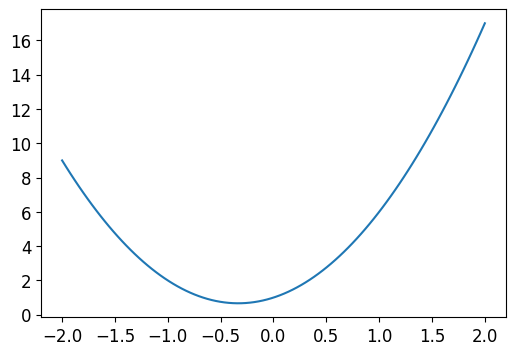

In [4]:
def quad(a, b, c, x): return a * x**2 + b * x + c
def mk_quad(a, b, c): return lambda x: quad(a, b, c, x)

f = mk_quad(3, 2, 1)

plot_function(f)

/var/folders/sw/90wb8rkd1d3ftpj152yhdlr80000gn/T/ipykernel_61056/3446769948.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return x * noise


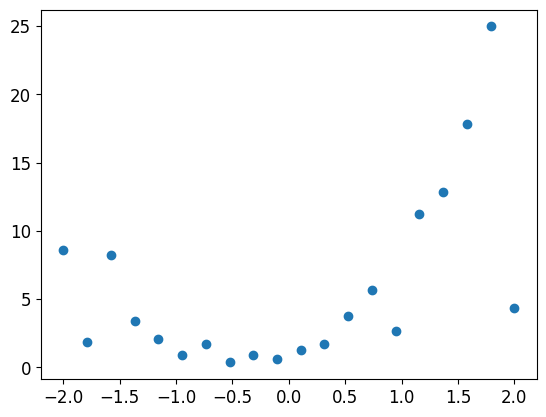

In [49]:
from numpy.random import normal,seed,uniform
np.random.seed(22)

def add_noise(x): 
    noise = normal(loc=1, scale=0.5, size=x.shape)
    return x * noise

def mse(preds, acts): return ((preds-acts)**2).mean()


x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x))

plt.scatter(x, y)


In [62]:
from ipywidgets import interact

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f1 = mk_quad(a, b, c)
    loss = mse(f1(x), y)
    plt.scatter(x, y)
    plt.plot(x, f1(x), label='f(x)', color='orange')
    plt.title(f'Loss: {loss:.2f}')
    plt.legend()
    #plt.show()
    


interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Here, we calculate the loss automaticly using tensor


In [76]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

quad_mse([1.5, 1.5, 1.5])
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

loss = quad_mse(abc)
print(f"Loss: {loss:.2f}")
loss.backward()

print(abc)
# show how much the loss will decrease if we increase a, b, or c
print("show how much the loss will decrease if we increase a, b, or c")
print(abc.grad)

with(torch.no_grad()):
    abc -= abc.grad * 0.1
    loss = quad_mse(abc)

print(f"New Loss: {loss:.2f}")

# iterate
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad():
        abc -= abc.grad * 0.1
    print(f"Step: {i}; Loss: {loss:.2f}")

Loss: 26.79
tensor([1.5000, 1.5000, 1.5000], requires_grad=True)
show how much the loss will decrease if we increase a, b, or c
tensor([-9.8317, -3.4028, -4.0507])
New Loss: 19.60
Step: 0; Loss: 19.60
Step: 1; Loss: 23.64
Step: 2; Loss: 26.08
Step: 3; Loss: 20.39
Step: 4; Loss: 24.27


Paused in "A chart of all images compared" 